<a href="https://colab.research.google.com/github/iresh-rajitha/Character-seperate-using-CV/blob/main/Character_seperate_using_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Install necessary libraries
!pip install opencv-python

In [16]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

In [23]:
# Upload the image file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving 1.jpg to 1 (2).jpg


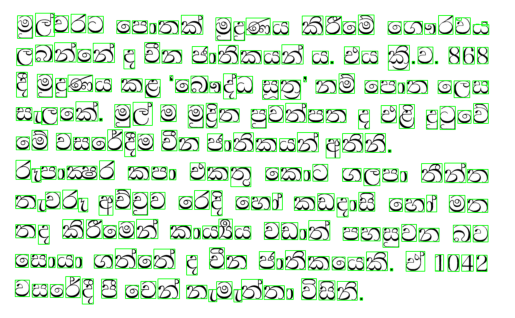

In [32]:
# prompt: I want to see segment in the image, can you draw green 1 pixel rectangle over the chracters

def segment_characters(image_path):

  # Load the image
  img = cv2.imread(image_path)

  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply thresholding
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # Find contours
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort contours by x-coordinate
  contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

  # Segment characters and detect whitespaces
  segmented_chars = []
  prev_x = 0
  for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # Check for whitespace
    if x - prev_x > 10: # Adjust 10 as needed for whitespace detection sensitivity
      segmented_chars.append(None) # Represent whitespace
    # Draw green rectangle
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    char_img = img[y:y + h, x:x + w]
    segmented_chars.append(char_img)
    prev_x = x + w

  # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for plt.imshow
  # plt.subplot(1, 2, 1)
  plt.imshow(img) # Convert BGR to RGB for plt.imshow
  # plt.subplot(1, 2, 2)
  # plt.imshow(thresh) # Convert BGR to RGB for plt.imshow
  # save image
  plt.savefig("result.png")
  plt.axis('off')
  plt.show()

  return segmented_chars, img

# Example usage

segmented_chars, result_img = segment_characters(image_path)

# Display or save the segmented characters
# for i, char_img in enumerate(segmented_chars):
#   cv2.imwrite(f"char_{i}.png", char_img)

# Display the image with rectangles
# cv2.imwrite("result.png", result_img)

# Display the image with green rectangles

